In [1]:
import cv2
import numpy as np
from PIL import Image
import torch
import matplotlib.pyplot as plt

(1214, 2314)
[[177. 177. 178. 176. 177. 180. 181. 178. 179. 181.]
 [175. 176. 176. 177. 177. 179. 179. 180. 178. 176.]
 [176. 176. 177. 177. 178. 182. 180. 180. 179. 175.]
 [179. 178. 180. 181. 179. 180. 179. 178. 176. 179.]
 [179. 182. 181. 180. 178. 179. 180. 182. 177. 177.]
 [181. 181. 180. 180. 179. 179. 177. 179. 180. 180.]
 [179. 180. 179. 179. 181. 177. 177. 177. 181. 181.]
 [178. 177. 177. 178. 178. 180. 179. 178. 182. 180.]
 [179. 177. 177. 179. 179. 179. 176. 178. 181. 181.]
 [176. 176. 179. 176. 177. 176. 180. 178. 179. 180.]]


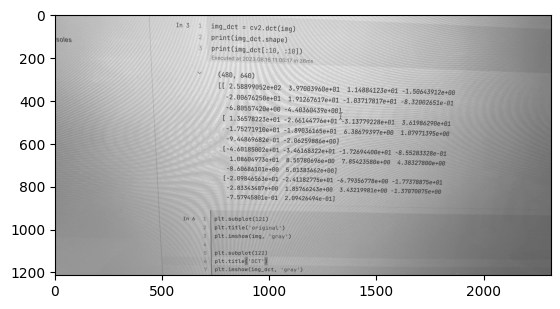

In [24]:
# img = cv2.imread('0.jpg', cv2.IMREAD_GRAYSCALE).astype(np.float32) #读取为灰度图片
img = cv2.imread('1.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)
# img = cv2.imread('2.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)
# img = cv2.imread('3.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)
# img = cv2.imread('4.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)
# img = cv2.imread('5.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)
# img = cv2.imread('6.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
print(img[:10, :10])
plt.imshow(img, 'gray')
plt.show()
# cv2.imshow('test', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

(1214, 2314)
[[2.8456562e+05 2.1171279e+04 2.5166006e+04 1.7913533e+03 8.6624463e+03
  2.4855903e+03 2.8402502e+03 2.3751614e+03 3.4022839e+02 1.5162128e+01]
 [2.6815748e+04 4.9036224e+02 5.3019830e+02 2.1856736e+03 3.0398601e+03
  6.4257904e+02 1.4953979e+03 7.7351170e+00 9.1688696e+02 6.1392517e+02]
 [9.9269440e+02 2.1349429e+03 6.3802069e+02 3.8252671e+03 2.4213586e+03
  4.7174728e+02 2.4133202e+02 6.3615656e+02 9.2692090e+02 6.0524712e+01]
 [1.4451494e+02 9.4997205e+02 1.3403011e+03 7.2539909e+01 7.1053217e+02
  3.8798993e+02 3.7461859e+02 1.3300774e+02 9.4597282e+01 5.5884972e+00]
 [2.2874653e+03 6.0408600e+01 9.2866248e+02 2.2056769e+02 7.2635338e+01
  9.8337044e+01 8.0860924e+01 5.2570813e+02 2.7310562e+01 7.7248201e+00]
 [6.2857074e+02 6.2382367e+02 2.4371326e+01 3.4821823e+02 1.7739220e+02
  3.4814377e+02 2.0899477e+02 1.0118779e+02 3.0026611e+01 3.4185751e+02]
 [1.2271981e+03 8.3204150e+02 2.8146838e+02 5.2809387e+02 5.4620537e+01
  3.9729523e+02 2.2232143e+02 1.5037001e+02 2

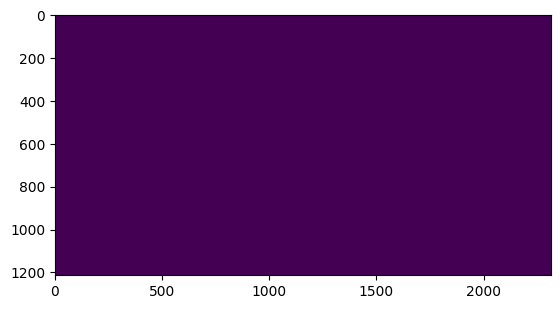

In [25]:
img_dct = cv2.dct(img)
# img_dct_f = np.log(np.abs(img_dct))
img_dct_f = np.abs(img_dct)
print(img_dct.shape)
print(img_dct_f[:10, :10])
plt.imshow(img_dct_f)
plt.show()

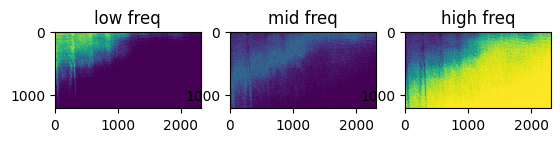

In [26]:
# lf = (img_dct_f >= 0) * (img_dct_f < 10)
lf = img_dct_f > 20
mf = (img_dct_f >= 10) * (img_dct_f < 20)
hf = img_dct_f < 10

plt.subplot(131)
plt.title('low freq')
plt.imshow(lf)

plt.subplot(132)
plt.title('mid freq')
plt.imshow(mf)

plt.subplot(133)
plt.title('high freq')
plt.imshow(hf)

plt.show()

In [10]:
img_dct_low = cv2.idct(img_dct * lf)
img_dct_mid = cv2.idct(img_dct * mf)
img_dct_high = cv2.idct(img_dct * hf)

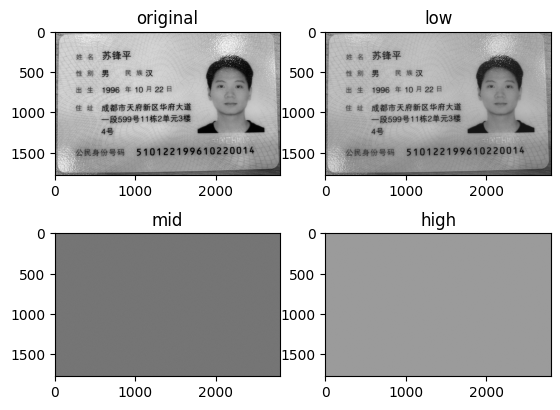

In [11]:
# plt.figure(figsize=(50,50))

plt.subplot(221)
plt.title('original')
plt.imshow(img, 'gray')

plt.subplot(222)
plt.title('low')
plt.imshow(img_dct_low, 'gray')

plt.subplot(223)
plt.title('mid')
plt.imshow(img_dct_mid, 'gray')

plt.subplot(224)
plt.title('high')
plt.imshow(img_dct_high, 'gray')

plt.show()

In [7]:
print(np.min(img_dct_low), np.max(img_dct_low))
print(np.min(img_dct_mid), np.max(img_dct_mid))
print(np.min(img_dct_high), np.max(img_dct_high))

-13.110798 276.99127
-49.47534 43.50743
-70.69798 54.720016


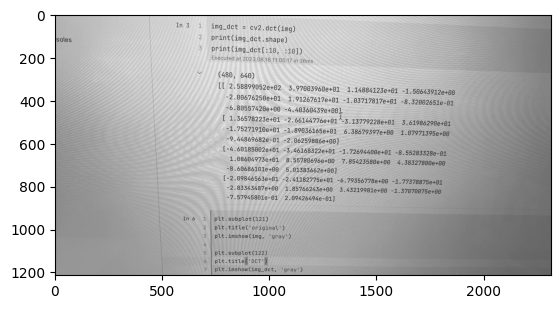

In [8]:
a = cv2.idct(img_dct)
plt.imshow(a, 'gray')
plt.show()

In [9]:
print(img_dct_low.shape)
print(img_dct_low[:,:,None].shape)

(1214, 2314)
(1214, 2314, 1)


In [10]:
def filter_bank_preprocess(img_path: str, k: int=10):
    img = cv2.imread(img_path, flags=cv2.IMREAD_GRAYSCALE).astype(np.float32)
    img_dct = cv2.dct(img)
    img_dct_f = np.abs(img_dct)

    low_freq = img_dct_f > 2*k
    mid_freq = (img_dct_f >= k) * (img_dct_f < 2*k)
    high_freq = img_dct_f < k

    img_dct_low = cv2.idct(img_dct * low_freq)[:, :, None]
    img_dct_mid = cv2.idct(img_dct * mid_freq)[:, :, None]
    img_dct_high = cv2.idct(img_dct * high_freq)[:, :, None]
    return np.concatenate((img_dct_low, img_dct_mid, img_dct_high), axis=2)

In [11]:
res = filter_bank_preprocess('1.png')

In [12]:
print(res.shape)

(1214, 2314, 3)


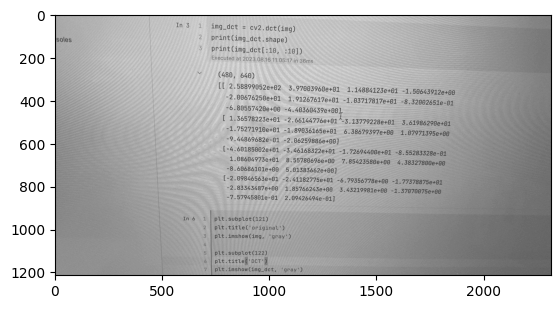

In [13]:
t = res[:,:,0]
plt.imshow(t, 'gray')
plt.show()

In [14]:
img = cv2.imread('0.jpg').astype(np.float32) #读取为灰度图片
print(img.shape)

(480, 640, 3)


In [15]:
img = cv2.imread('0.jpg')
print(isinstance(torch.from_numpy(img), torch.ByteTensor))

True


In [16]:
from utils.transforms import DCT
from data.dataset import RecaptureDataset
from torchvision.transforms import transforms as T
from config import opt

img = Image.open('0.jpg')
transform = T.Compose([
    T.Resize(opt.img_size),
    DCT()
])

img = transform(img)
print(type(img), img.shape)
print(torch.max(img))

<class 'torch.Tensor'> torch.Size([3, 224, 224])
tensor(1.0532)


In [18]:
from torchvision.models import mobilenet_v3_small

model = mobilenet_v3_small(weights=False)


In [32]:
print(model)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [38]:
print(model.features[-1])

Conv2dNormActivation(
  (0): Conv2d(96, 576, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (1): BatchNorm2d(576, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
  (2): Hardswish()
)


In [41]:
from torchvision.models import resnet50

model = resnet50(weights=False)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [42]:
model.conv1

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [2]:
from models.models import ResNet50Branch
model = ResNet50Branch()
print(model(torch.randn(1,3,224,224))[2].shape)

torch.Size([1, 2048, 7, 7])


In [5]:
a = torch.randn(2,3,4,5)
print(a.flatten(1,2).shape)

torch.Size([2, 12, 5])
